In [4]:
import numpy as np
from math import pi, sqrt
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact

In [5]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3
m0=9.1e-31 # kg
m=m0/10

B=10 # Tesla
hwc=hbar*(elec*B/m)
lB=np.sqrt(hbar/(elec*B))

ky1_sw=np.linspace(-16,5,140)/lB


# Lx=100e-9
Lx_q=12*lB
Nx=200
kx=2*pi*np.arange(Nx)/(2*Lx_q)-pi*Nx/(2*Lx_q)
[k1,k2]=2*pi*np.mgrid[range(Nx),range(Nx)]/(2*Lx_q)-pi*Nx/(2*Lx_q)

Hx=np.diag(hbar**2 * kx**2/(2*m))

def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= (-2j+np.exp(1j*k*Lx_q)*(2j+ 2*k*Lx_q- 1j* k**2 * Lx_q**2))/ (k**3) /(2*Lx_q)
        c[ ~ np.isfinite( c )] = Lx_q**2 /6.0
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = (-1+np.exp(1j*k*Lx_q)*(1- 1j* k * Lx_q))/ (k**2) /(2*Lx_q)
        c[ ~ np.isfinite( c )] = Lx_q/4.0
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = -1j*(-1+np.exp(1j*k*Lx_q) )/(k*2*Lx_q)
        c[ ~ np.isfinite( c )] = 0.5
    return c

def y0s(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 1j*(-1+np.exp(-1j*k*Lx_q) )/(k*2*Lx_q)
        c[ ~ np.isfinite( c )] = 0.5
    return c


HeB2= ((elec*B)**2 *2*np.real(y2(k1-k2)))/ (2*m)
HeB0_a= -1j*hwc*np.imag(y0(k1-k2))


sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])

En_a=np.zeros((Nx,len(ky1_sw)))
En_z=np.zeros((Nx,len(ky1_sw)))

for i_y in range(len(ky1_sw)):
    ky=ky1_sw[i_y]
    Hy=(hbar**2 * ky**2/(2*m))*np.eye(Nx)
    HeB1_zigzag=-2j*hbar *ky* ( elec*B*np.imag(y1(k1-k2)))/m
    HeB1_armchair= -2*hbar *ky* ( elec*B*np.real(y1(k1-k2)))/m
    H_z=Hx+Hy+HeB2+HeB1_zigzag
    H_a=Hx+Hy+HeB2+HeB1_armchair+HeB0_a
    En_z[:,i_y] = np.linalg.eigvalsh(H_z)
    En_a[:,i_y] = np.linalg.eigvalsh(H_a)
    
print("Done!")

Done!


In [8]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3

vF=1e6
B=10 # Tesla
hwc_d=vF*sqrt(2*hbar*elec*B)
lB_d=np.sqrt(hbar/(elec*B))
m_sc=8*hwc_d #1e2*meV
mu_sc=0*hwc_d #1e2*meV
nu=0.#sqrt(2)+0.1
m_n= 0.*hwc_d
mu_n=nu*hwc_d #10*meV
ky2_sw=np.linspace(-1,4,50)/lB_d


Ls_d=0*lB_d
Lx_d=12*lB_d
Nx=200
kx=2*pi*np.arange(Nx)/(2*Lx_d+Ls_d)-pi*Nx/(2*Lx_d+Ls_d)
[k1,k2]=2*pi*np.mgrid[range(Nx),range(Nx)]/(2*Lx_d+Ls_d)-pi*Nx/(2*Lx_d+Ls_d)


def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= np.exp(1j*k*Ls_d/2)*(-2j+np.exp(1j*k*Lx_d)*(2j+ 2*k*Lx_d- 1j* k**2 * Lx_d**2))/ (k**3) /(2*Lx_d+Ls_d)
        c[ ~ np.isfinite( c )] = Lx_d**3 /(3*(2*Lx_d+Ls_d))
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.exp(1j*k*Ls_d/2)*(-1+np.exp(1j*k*Lx_d)*(1- 1j* k * Lx_d))/ (k**2) /(2*Lx_d+Ls_d)
        c[ ~ np.isfinite( c )] = Lx_d**2 /(2*(2*Lx_d+Ls_d))
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = -1j*np.exp(1j*k*Ls_d/2)*(-1+np.exp(1j*k*Lx_d) )/(k*(2*Lx_d+Ls_d))
        c[ ~ np.isfinite( c )] = Lx_d /(2*Lx_d+Ls_d)
    return c

def y0s(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 2*np.sin(k*Ls_d/2)/(k*(2*Lx_d+Ls_d))
        c[ ~ np.isfinite( c )] = Ls_d /(2*Lx_d+Ls_d)
    return c

sigma0=np.array([[1,0],[0,1]])
sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])

Hx= hbar*vF*np.kron(np.diag(kx) , sigma1)
HeB= -2*vF*elec*B* np.kron(np.real(y1(k1-k2)), sigma2)
# HeB= -2*vF*elec*B* np.kron(np.real(y1(k1-k2))-1j*np.imag(Ls_d/2*y0(k1-k2)), sigma2)
# HeB= -2*vF*elec*B* np.kron(np.real(y1(k2-k1))+np.real(Ls_d/2*y0(k2-k1)), sigma2)


Hxm= np.kron( y0s(k1-k2) , m_sc*sigma3 )+ np.kron( 2*np.real(y0(k1-k2)) , m_n*sigma3)
Hef= -np.kron( 2*mu_n*np.real(y0(k1-k2)) + mu_sc*y0s(k1-k2), sigma0 )

En_d=np.zeros((2*Nx,len(ky2_sw)))
for i_y in range(len(ky2_sw)):
    ky=ky2_sw[i_y]
    Hy= np.kron(hbar*vF*ky*np.eye(Nx), sigma2)

    H_t = Hx +Hy + HeB + Hxm + Hef    
    En_d[:,i_y] =np.linalg.eigvalsh(H_t)

print("Done!")

Done!


/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/tmp/yes/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


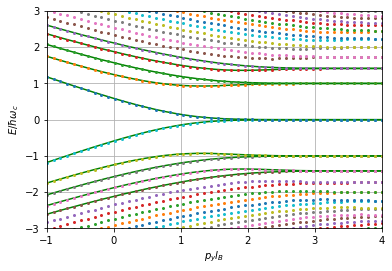

In [9]:
plt.figure()

# plt.plot(ky1_sw*lB+Lx_q/lB,np.sqrt(En_z[:2,:].T/hwc+1/2),'b')
# plt.plot(ky1_sw*lB+Lx_q/lB,-np.sqrt(En_z[:2,:].T/hwc+1/2),'b')
# # plt.plot(ky1_sw*lB+Lx_q/lB/2,0*ky_sw,'b')
# plt.plot(ky1_sw*lB+Lx_q/lB,np.real(np.sqrt(En_z[:3,:].T/hwc-1/2)),'r')
# plt.plot(ky1_sw*lB+Lx_q/lB,-np.real(np.sqrt(En_z[:3,:].T/hwc-1/2)),'r')

# plt.plot(ky1_sw*lB,np.sqrt(En_a[:5,:].T/hwc),'g')
# plt.plot(ky1_sw*lB,-np.sqrt(En_a[:5,:].T/hwc),'g')
# # plt.plot(ky1_sw*lB+Lx_q/lB/2,0*ky_sw,'b')

# # plt.plot(ky2_sw*lB_d-0*Ls_d/lB_d/2,En_d.T/hwc_d,'o',markersize=2)

plt.ylabel(r"$E/\hbar\omega_c$")
# plt.xlabel("ky(1/nm)")
plt.xlabel(r"$p_y l_B$")
plt.ylim(-3,3)
plt.xlim(-1,4)
plt.grid()
# plt.savefig('Abanin.pdf')
plt.show()

plt.figure()
plt.plot(ky1_sw*lB,np.sqrt(En_a[:5,:].T/hwc),'g')
plt.plot(ky1_sw*lB,-np.sqrt(En_a[:5,:].T/hwc),'g')
# plt.plot(ky1_sw*lB+Lx_q/lB/2,0*ky_sw,'b')
# plt.plot(ky2_sw*lB_d-0*Ls_d/lB_d/2,En_d.T/hwc_d,'o',markersize=2)

plt.ylabel(r"$E/\hbar\omega_c$")
plt.xlabel(r"$p_y l_B$")
plt.ylim(-3,3)
plt.xlim(-1,4)
plt.grid()
plt.savefig('Abanin.pdf')
plt.show()

